In [1]:
import pandas as pd

In [2]:
dataframe =pd.read_csv("./Israel-Palestine.csv")

Renommer les colonnes 

In [3]:
dataframe.columns = ['Année', 'Pays','GDP (en USD)','Population','Le Produit Intérieur brut (%)','Taux de fécondité','Taux de mortalité infantille (pour 1 000 naissances vivantes)','Taux de mortalité maternelle (pour 1 00000 naissances vivantes)','Production agricole (en USD)','Personnel militaire actif','Personnel militaire de réserve','Taux d''alphabetisation(%)','La production informatique (en USD)' ,'Le nombre de chars d''assut','Le nombre de sous marines' ,'Le nombre de véhicules']

Ajouter colonne ID

In [4]:
dataframe.insert(1,'ID', range(len(dataframe)))

Supprimer les doublons

In [5]:
dataframe.drop_duplicates(subset = ['ID'], keep = 'last')

,Année,ID,Pays,GDP (en USD),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),Personnel militaire actif,Personnel militaire de réserve,Taux dalphabetisation(%),La production informatique (en USD),Le nombre de chars dassut,Le nombre de sous marines,Le nombre de véhicules
0,2000,0,Israel,132.02 billion,"6,049,000",5.18,2.89,5.0,7.2,5.71 billion,"168,000","445,000",97.1,6.78 billion,"2,760",3.0,"10,760"
1,2000,1,Palestine,4.56 billion,"3,374,000",5.33,5.36,24.6,26.0,880 million,NaN,NaN,90.3,0.115 billion,NaN,NaN,NaN
2,2001,2,Israel,131.02 billion,"6,165,000",-0.47,2.89,4.8,6.7,5.17 billion,"166,500","445,000",97.5,6.89 billion,"2,791",3.0,"10,814"
3,2001,3,Palestine,4.59 billion,"3,400,000",-50.00,5.22,22.5,24.4,925 million,NaN,NaN,90.8,0.122 billion,NaN,NaN,NaN
4,2002,4,Israel,126.64 billion,"6,263,000",-0.35,2.98,4.6,5.9,4.76 billion,"163,000","375,000",97.9,7.02 billion,"2,821",3.0,"10,885"
5,2002,5,Palestine,4.34 billion,"3,421,000",-46.30,5.07,20.2,21.3,914 million,NaN,NaN,91.2,0.132 billion,NaN,NaN,NaN
6,2003,6,Israel,129.56 billion,"6,684,000",2.80,2.81,4.3,6.1,5.10 billion,"160,000","445,000",97.9,7.15 billion,"2,819",3.0,"10,885"
7,2003,7,Palestine,3.56 billion,"3,693,000",-16.10,5.15,23.0,30.9,819 million,NaN,NaN,91.7,0.143 billion,NaN,NaN,NaN
8,2004,8,Israel,143.53 billion,"6,830,000",4.50,2.84,4.1,6.8,5.33 billion,"159,000","428,000",97.9,7.36 billion,"2,798",3.0,"10,886"
9,2004,9,Palestine,3.89 billion,"3,791,000",10.50,4.95,21.6,29.4,876 million,NaN,NaN,92.1,0.154 billion,NaN,NaN,NaN


Afficher les types de données de chaque colonne

In [6]:
dataframe.dtypes

Année                                                                int64
ID                                                                   int64
Pays                                                                object
GDP (en USD)                                                        object
Population                                                          object
Le Produit Intérieur brut (%)                                      float64
Taux de fécondité                                                  float64
Taux de mortalité infantille (pour 1 000 naissances vivantes)      float64
Taux de mortalité maternelle (pour 1 00000 naissances vivantes)    float64
Production agricole (en USD)                                        object
Personnel militaire actif                                           object
Personnel militaire de réserve                                      object
Taux dalphabetisation(%)                                           float64
La production informatiqu

Convertir la colonne 'GDP (en USD)' en 'GDP (en TND)'

In [7]:
dataframe['GDP (en USD)'] = dataframe['GDP (en USD)'].str.replace(' billion', '').astype(float) * 1e9

In [8]:
taux_de_change = 3.09710
dataframe['GDP (en TND)'] = dataframe['GDP (en USD)'] / taux_de_change

In [9]:
def identifier_Standard_Notation(valeur):
    if valeur >= 1e12:
        return str(round(valeur / 1e12, 2)) + ' trillion'
    elif valeur >= 1e9:
        return str(round(valeur / 1e9, 2)) + ' billion'
    elif valeur >= 1e6:
        return str(round(valeur / 1e6, 2)) + ' million'
    else:
        return str(valeur)

dataframe['GDP (en TND)'] = dataframe['GDP (en TND)'].apply(identifier_Standard_Notation)

In [10]:
del dataframe['GDP (en USD)']

Réordonner la colonne 

In [11]:
new_order_columns = ['ID','Année', 'Pays','GDP (en TND)','Population','Le Produit Intérieur brut (%)','Taux de fécondité','Taux de mortalité infantille (pour 1 000 naissances vivantes)','Taux de mortalité maternelle (pour 1 00000 naissances vivantes)','Production agricole (en USD)','Personnel militaire actif','Personnel militaire de réserve','Taux d''alphabetisation(%)','La production informatique (en USD)' ,'Le nombre de chars d''assut','Le nombre de sous marines' ,'Le nombre de véhicules']
dataframe=dataframe[new_order_columns]
dataframe

,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),Personnel militaire actif,Personnel militaire de réserve,Taux dalphabetisation(%),La production informatique (en USD),Le nombre de chars dassut,Le nombre de sous marines,Le nombre de véhicules
0,0,2000,Israel,42.63 billion,"6,049,000",5.18,2.89,5.0,7.2,5.71 billion,"168,000","445,000",97.1,6.78 billion,"2,760",3.0,"10,760"
1,1,2000,Palestine,1.47 billion,"3,374,000",5.33,5.36,24.6,26.0,880 million,NaN,NaN,90.3,0.115 billion,NaN,NaN,NaN
2,2,2001,Israel,42.3 billion,"6,165,000",-0.47,2.89,4.8,6.7,5.17 billion,"166,500","445,000",97.5,6.89 billion,"2,791",3.0,"10,814"
3,3,2001,Palestine,1.48 billion,"3,400,000",-50.00,5.22,22.5,24.4,925 million,NaN,NaN,90.8,0.122 billion,NaN,NaN,NaN
4,4,2002,Israel,40.89 billion,"6,263,000",-0.35,2.98,4.6,5.9,4.76 billion,"163,000","375,000",97.9,7.02 billion,"2,821",3.0,"10,885"
5,5,2002,Palestine,1.4 billion,"3,421,000",-46.30,5.07,20.2,21.3,914 million,NaN,NaN,91.2,0.132 billion,NaN,NaN,NaN
6,6,2003,Israel,41.83 billion,"6,684,000",2.80,2.81,4.3,6.1,5.10 billion,"160,000","445,000",97.9,7.15 billion,"2,819",3.0,"10,885"
7,7,2003,Palestine,1.15 billion,"3,693,000",-16.10,5.15,23.0,30.9,819 million,NaN,NaN,91.7,0.143 billion,NaN,NaN,NaN
8,8,2004,Israel,46.34 billion,"6,830,000",4.50,2.84,4.1,6.8,5.33 billion,"159,000","428,000",97.9,7.36 billion,"2,798",3.0,"10,886"
9,9,2004,Palestine,1.26 billion,"3,791,000",10.50,4.95,21.6,29.4,876 million,NaN,NaN,92.1,0.154 billion,NaN,NaN,NaN


Renvoyer toutes les valeurs NaN remplacées par 0.

In [12]:
dataframe=dataframe.fillna(0)
dataframe

,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),Personnel militaire actif,Personnel militaire de réserve,Taux dalphabetisation(%),La production informatique (en USD),Le nombre de chars dassut,Le nombre de sous marines,Le nombre de véhicules
0,0,2000,Israel,42.63 billion,"6,049,000",5.18,2.89,5.0,7.2,5.71 billion,"168,000","445,000",97.1,6.78 billion,"2,760",3.0,"10,760"
1,1,2000,Palestine,1.47 billion,"3,374,000",5.33,5.36,24.6,26.0,880 million,0,0,90.3,0.115 billion,0,0.0,0
2,2,2001,Israel,42.3 billion,"6,165,000",-0.47,2.89,4.8,6.7,5.17 billion,"166,500","445,000",97.5,6.89 billion,"2,791",3.0,"10,814"
3,3,2001,Palestine,1.48 billion,"3,400,000",-50.00,5.22,22.5,24.4,925 million,0,0,90.8,0.122 billion,0,0.0,0
4,4,2002,Israel,40.89 billion,"6,263,000",-0.35,2.98,4.6,5.9,4.76 billion,"163,000","375,000",97.9,7.02 billion,"2,821",3.0,"10,885"
5,5,2002,Palestine,1.4 billion,"3,421,000",-46.30,5.07,20.2,21.3,914 million,0,0,91.2,0.132 billion,0,0.0,0
6,6,2003,Israel,41.83 billion,"6,684,000",2.80,2.81,4.3,6.1,5.10 billion,"160,000","445,000",97.9,7.15 billion,"2,819",3.0,"10,885"
7,7,2003,Palestine,1.15 billion,"3,693,000",-16.10,5.15,23.0,30.9,819 million,0,0,91.7,0.143 billion,0,0.0,0
8,8,2004,Israel,46.34 billion,"6,830,000",4.50,2.84,4.1,6.8,5.33 billion,"159,000","428,000",97.9,7.36 billion,"2,798",3.0,"10,886"
9,9,2004,Palestine,1.26 billion,"3,791,000",10.50,4.95,21.6,29.4,876 million,0,0,92.1,0.154 billion,0,0.0,0


Palestine 

In [45]:
palestine_data = dataframe[dataframe['Pays']=='Palestine'] 
palestine_data.reset_index(drop=True, inplace=True)
palestine_data['ID'] = range(1, len(palestine_data) + 1)
palestine_data

C:\Users\Asus\AppData\Local\Temp\ipykernel_11032\1065740509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestine_data['ID'] = range(1, len(palestine_data) + 1)


,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),Personnel militaire actif,Personnel militaire de réserve,Taux dalphabetisation(%),La production informatique (en USD),Le nombre de chars dassut,Le nombre de sous marines,Le nombre de véhicules,Personnel militaire,PIB Catégorie
0,1,2000-01-01,Palestine,1.47 billion,"3,374,000",5.33,5.36,24.6,26.0,880.0,0,0,90.3,0.115 billion,0,0.0,0,0 - 0,High PIB
1,2,2001-01-01,Palestine,1.48 billion,"3,400,000",-50.00,5.22,22.5,24.4,925.0,0,0,90.8,0.122 billion,0,0.0,0,0 - 0,Low PIB
2,3,2002-01-01,Palestine,1.4 billion,"3,421,000",-46.30,5.07,20.2,21.3,914.0,0,0,91.2,0.132 billion,0,0.0,0,0 - 0,Low PIB
3,4,2003-01-01,Palestine,1.15 billion,"3,693,000",-16.10,5.15,23.0,30.9,819.0,0,0,91.7,0.143 billion,0,0.0,0,0 - 0,Low PIB
4,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.50,4.95,21.6,29.4,876.0,0,0,92.1,0.154 billion,0,0.0,0,0 - 0,High PIB
5,6,2005-01-01,Palestine,1.33 billion,"3,890,000",7.60,4.78,19.7,28.1,927.0,0,0,92.5,0.165 billion,0,0.0,0,0 - 0,High PIB
6,7,2006-01-01,Palestine,1.44 billion,"3,762,000",5.80,4.14,18.6,25.4,929.0,0,0,91.9,0.230 billion,0,0.0,0,0 - 0,High PIB
7,8,2007-01-01,Palestine,1.6 billion,"3,865,000",5.30,4.07,17.6,24.3,978.0,0,0,0.0,0,0,0.0,0,0 - 0,High PIB
8,9,2008-01-01,Palestine,1.63 billion,"3,966,000",4.20,3.98,16.7,23.2,102.0,0,0,0.0,0,0,0.0,0,0 - 0,Medium PIB
9,10,2009-01-01,Palestine,1.61 billion,"4,018,000",6.80,4.00,15.9,22.4,104.0,0,0,0.0,0,0,0.0,0,0 - 0,High PIB


Tri Taux de mortalité infantille && Taux de mortalité maternelle en ordre décroissant

In [14]:
palestine_data.sort_values(by=['Taux de mortalité infantille (pour 1 000 naissances vivantes)','Taux de mortalité maternelle (pour 1 00000 naissances vivantes)'], ascending=False)
palestine_data[['Année','Taux de mortalité infantille (pour 1 000 naissances vivantes)','Taux de mortalité maternelle (pour 1 00000 naissances vivantes)']]

,Année,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes)
1,2000,24.6,26.0
3,2001,22.5,24.4
5,2002,20.2,21.3
7,2003,23.0,30.9
9,2004,21.6,29.4
11,2005,19.7,28.1
13,2006,18.6,25.4
15,2007,17.6,24.3
17,2008,16.7,23.2
19,2009,15.9,22.4


Tri Taux dalphabetisation & La production informatique en ordre croissant

In [15]:
palestine_data.sort_values(by=['Taux dalphabetisation(%)','La production informatique (en USD)'])
palestine_data[['Année','Taux dalphabetisation(%)','La production informatique (en USD)']]

,Année,Taux dalphabetisation(%),La production informatique (en USD)
1,2000,90.3,0.115 billion
3,2001,90.8,0.122 billion
5,2002,91.2,0.132 billion
7,2003,91.7,0.143 billion
9,2004,92.1,0.154 billion
11,2005,92.5,0.165 billion
13,2006,91.9,0.230 billion
15,2007,0.0,0
17,2008,0.0,0
19,2009,0.0,0


In [16]:
import numpy as np
import matplotlib.pyplot as plt

La Moyenne && la pourcentage de Production agricole

In [17]:
dataframe['Production agricole (en USD)'] = dataframe['Production agricole (en USD)'].str.replace(r'\D', '', regex=True).astype(float)

In [18]:
Moyonne_ProAgr = np.nanmean(dataframe['Production agricole (en USD)'])
print ('La moyenne de production agricole est : ',Moyonne_ProAgr)

La moyenne de production agricole est :  489.59090909090907


In [19]:
ProAgr_Totale = dataframe["Production agricole (en USD)"].sum() 
print ('La production agricole totale est : ',ProAgr_Totale)
Pourt_ProAgr  = (Moyonne_ProAgr/ProAgr_Totale) * 100
print ('La pourcentage de production agricole est : ',Pourt_ProAgr,'%')

La production agricole totale est :  21542.0
La pourcentage de production agricole est :  2.2727272727272725 %


Fusionner dans une nouvelle colonne Personnel militaire

In [20]:
dataframe['Personnel militaire actif'] =dataframe['Personnel militaire actif'].astype(str)
dataframe['Personnel militaire de réserve'] =dataframe['Personnel militaire de réserve'].astype(str)

In [21]:
dataframe['Personnel militaire'] = dataframe['Personnel militaire actif'] +" - "+ dataframe['Personnel militaire de réserve']
print(dataframe['Personnel militaire'])

0     168,000 - 445,000
1                 0 - 0
2     166,500 - 445,000
3                 0 - 0
4     163,000 - 375,000
5                 0 - 0
6     160,000 - 445,000
7                 0 - 0
8     159,000 - 428,000
9                 0 - 0
10    156,000 - 411,000
11                0 - 0
12    176,500 - 438,000
13                0 - 0
14    179,900 - 436,000
15                0 - 0
16    177,400 - 435,000
17                0 - 0
18    169,700 - 434,000
19                0 - 0
20    170,300 - 431,000
21                0 - 0
22    170,750 - 429,500
23                0 - 0
24    171,450 - 428,000
25                0 - 0
26    174,550 - 424,750
27                0 - 0
28    177,350 - 421,500
29                0 - 0
30    176,500 - 418,500
31                0 - 0
32    176,500 - 415,000
33                0 - 0
34    174,500 - 410,000
35                0 - 0
36    170,000 - 405,000
37                0 - 0
38    169,500 - 399,000
39                0 - 0
40    169,500 - 395,000
41              

Catégoriser le Produit Intérieur brut 

In [22]:
bins = [-float('inf'), 0, 5, float('inf')]
labels = ["Low PIB", "Medium PIB", "High PIB"]
dataframe['PIB Catégorie '] = pd.cut(dataframe['Le Produit Intérieur brut (%)'], bins=bins, labels=labels)

Israel 

In [23]:
israel_data = dataframe[dataframe['Pays']=='Israel'] 
israel_data

,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),Personnel militaire actif,Personnel militaire de réserve,Taux dalphabetisation(%),La production informatique (en USD),Le nombre de chars dassut,Le nombre de sous marines,Le nombre de véhicules,Personnel militaire,PIB Catégorie
0,0,2000,Israel,42.63 billion,"6,049,000",5.18,2.89,5.0,7.2,571.0,"168,000","445,000",97.1,6.78 billion,"2,760",3.0,"10,760","168,000 - 445,000",High PIB
2,2,2001,Israel,42.3 billion,"6,165,000",-0.47,2.89,4.8,6.7,517.0,"166,500","445,000",97.5,6.89 billion,"2,791",3.0,"10,814","166,500 - 445,000",Low PIB
4,4,2002,Israel,40.89 billion,"6,263,000",-0.35,2.98,4.6,5.9,476.0,"163,000","375,000",97.9,7.02 billion,"2,821",3.0,"10,885","163,000 - 375,000",Low PIB
6,6,2003,Israel,41.83 billion,"6,684,000",2.80,2.81,4.3,6.1,510.0,"160,000","445,000",97.9,7.15 billion,"2,819",3.0,"10,885","160,000 - 445,000",Medium PIB
8,8,2004,Israel,46.34 billion,"6,830,000",4.50,2.84,4.1,6.8,533.0,"159,000","428,000",97.9,7.36 billion,"2,798",3.0,"10,886","159,000 - 428,000",Medium PIB
10,10,2005,Israel,50.06 billion,"6,925,000",4.97,2.87,3.9,6.4,538.0,"156,000","411,000",98.4,7.69 billion,"2,771",3.0,"10,876","156,000 - 411,000",Medium PIB
12,12,2006,Israel,57.8 billion,"7,112,000",4.60,2.87,3.8,6.1,548.0,"176,500","438,000",97.8,6.90 billion,"2,760",3.0,"10,634","176,500 - 438,000",Medium PIB
14,14,2007,Israel,63.08 billion,"7,295,000",4.90,2.90,3.7,5.9,560.0,"179,900","436,000",97.8,7.20 billion,"2,760",3.0,"10,634","179,900 - 436,000",Medium PIB
16,16,2008,Israel,69.73 billion,"7,413,000",1.20,2.93,3.7,5.6,584.0,"177,400","435,000",97.8,7.40 billion,"2,760",3.0,"10,634","177,400 - 435,000",Medium PIB
18,18,2009,Israel,65.54 billion,"7,602,000",0.80,2.93,4.0,5.5,580.0,"169,700","434,000",97.8,7.50 billion,"2,760",3.0,"10,634","169,700 - 434,000",Medium PIB


L'analyse des statistiques descriptives 

In [24]:
print(israel_data.describe())

              ID        Année  Le Produit Intérieur brut (%)  \
count  22.000000    22.000000                      22.000000   
mean   21.000000  2010.500000                       2.893636   
std    12.987173     6.493587                       2.030889   
min     0.000000  2000.000000                      -2.400000   
25%    10.500000  2005.250000                       1.872500   
50%    21.000000  2010.500000                       3.400000   
75%    31.500000  2015.750000                       4.575000   
max    42.000000  2021.000000                       5.180000   

       Taux de fécondité  \
count          22.000000   
mean            2.963182   
std             0.079306   
min             2.810000   
25%             2.892500   
50%             2.970000   
75%             3.027500   
max             3.060000   

       Taux de mortalité infantille (pour 1 000 naissances vivantes)  \
count                                          22.000000               
mean                      

Graphe :Évolution du Taux de fécondité au fil des années

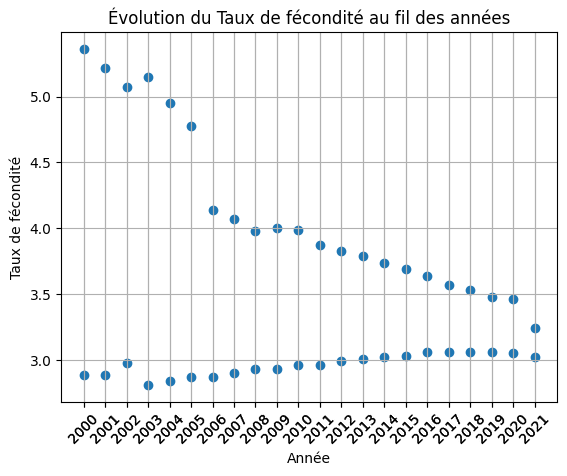

In [25]:

plt.scatter(dataframe['Année'] ,dataframe['Taux de fécondité'])
plt.xlabel('Année')
plt.ylabel('Taux de fécondité')
plt.title('Évolution du Taux de fécondité au fil des années')
plt.grid(True)
plt.xticks(dataframe['Année'], rotation=45)
plt.show()



Normaliser l'annee

In [26]:
dataframe['Année'] = pd.to_datetime(dataframe['Année'], format='%Y')
dataframe['Année']

0    2000-01-01
1    2000-01-01
2    2001-01-01
3    2001-01-01
4    2002-01-01
5    2002-01-01
6    2003-01-01
7    2003-01-01
8    2004-01-01
9    2004-01-01
10   2005-01-01
11   2005-01-01
12   2006-01-01
13   2006-01-01
14   2007-01-01
15   2007-01-01
16   2008-01-01
17   2008-01-01
18   2009-01-01
19   2009-01-01
20   2010-01-01
21   2010-01-01
22   2011-01-01
23   2011-01-01
24   2012-01-01
25   2012-01-01
26   2013-01-01
27   2013-01-01
28   2014-01-01
29   2014-01-01
30   2015-01-01
31   2015-01-01
32   2016-01-01
33   2016-01-01
34   2017-01-01
35   2017-01-01
36   2018-01-01
37   2018-01-01
38   2019-01-01
39   2019-01-01
40   2020-01-01
41   2020-01-01
42   2021-01-01
43   2021-01-01
Name: Année, dtype: datetime64[ns]

Deuxiéme DataSet 

In [27]:
dataframe2=pd.read_csv('./House Demolitions in Palestine.csv')
dataframe2

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN
...,...,...,...,...,...,...,...,...,...,...
267,2004.0,4,20,0,Gaza Strip,Residential Structure,Complete Demolition,Noth Gaza,Demolition of houses as punishment,NaN
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Complete Demolition,Rafah,Demolition of houses as punishment,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Renommer les colonnes

In [28]:
dataframe2.columns = ['Année', 'Unités de logement','Personnes rendues sans abri','Mineurs rendus sans abri','Zone','Type de structure','Portée de la démolition','District','Raison de la démolition','Démolition effectuée par']
dataframe2

,Année,Unités de logement,Personnes rendues sans abri,Mineurs rendus sans abri,Zone,Type de structure,Portée de la démolition,District,Raison de la démolition,Démolition effectuée par
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN
...,...,...,...,...,...,...,...,...,...,...
267,2004.0,4,20,0,Gaza Strip,Residential Structure,Complete Demolition,Noth Gaza,Demolition of houses as punishment,NaN
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Complete Demolition,Rafah,Demolition of houses as punishment,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Supprimer les valeurs NAN de colonne Year -df2-

In [29]:
dataframe2.dropna(subset=['Année'], inplace=True)
dataframe2['Année']

0      2021.0
1      2021.0
2      2021.0
3      2021.0
4      2021.0
        ...  
264    2004.0
265    2004.0
266    2004.0
267    2004.0
268    2004.0
Name: Année, Length: 269, dtype: float64

Normaliser l'année

In [30]:
dataframe2['Année'] = dataframe2['Année'].astype('Int64') 
dataframe2['Année'] = pd.to_datetime(dataframe2['Année'], format='%Y')
dataframe2['Année']

0     2021-01-01
1     2021-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
264   2004-01-01
265   2004-01-01
266   2004-01-01
267   2004-01-01
268   2004-01-01
Name: Année, Length: 269, dtype: datetime64[ns]

Normaliser l'année -palestine Data-

In [31]:
palestine_data['Année'] = pd.to_datetime(palestine_data['Année'], format='%Y')
palestine_data['Année']

C:\Users\Asus\AppData\Local\Temp\ipykernel_11032\1570240692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestine_data['Année'] = pd.to_datetime(palestine_data['Année'], format='%Y')


1    2000-01-01
3    2001-01-01
5    2002-01-01
7    2003-01-01
9    2004-01-01
11   2005-01-01
13   2006-01-01
15   2007-01-01
17   2008-01-01
19   2009-01-01
21   2010-01-01
23   2011-01-01
25   2012-01-01
27   2013-01-01
29   2014-01-01
31   2015-01-01
33   2016-01-01
35   2017-01-01
37   2018-01-01
39   2019-01-01
41   2020-01-01
43   2021-01-01
Name: Année, dtype: datetime64[ns]

Jointure de deux DatSets

In [46]:
joinDataframe = pd.merge(palestine_data, dataframe2, on='Année', how='inner')
joinDataframe

,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),...,PIB Catégorie,Unités de logement,Personnes rendues sans abri,Mineurs rendus sans abri,Zone,Type de structure,Portée de la démolition,District,Raison de la démolition,Démolition effectuée par
0,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,53,194,110,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
1,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,27,138,0,Gaza Strip,Residential Structure,Complete Demolition,Deir al-Balah,Demolition for alleged military purposes,NaN
2,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,64,123,0,Gaza Strip,Residential Structure,Complete Demolition,Gaza,Demolition for alleged military purposes,NaN
3,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,408,"3,023",0,Gaza Strip,Residential Structure,Complete Demolition,Khan Yunis,Demolition for alleged military purposes,NaN
4,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,123,975,0,Gaza Strip,Residential Structure,Complete Demolition,North Gaza,Demolition for alleged military purposes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,22,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,14,29,14,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
265,22,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,8,27,15,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Owners
266,22,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,18,0,0,East Jerusalem,Non Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
267,22,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,5,0,0,East Jerusalem,Non Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Owners


In [50]:
joinDataframe['ID'] = range(1, len(joinDataframe) + 1)
joinDataframe

,ID,Année,Pays,GDP (en TND),Population,Le Produit Intérieur brut (%),Taux de fécondité,Taux de mortalité infantille (pour 1 000 naissances vivantes),Taux de mortalité maternelle (pour 1 00000 naissances vivantes),Production agricole (en USD),...,PIB Catégorie,Unités de logement,Personnes rendues sans abri,Mineurs rendus sans abri,Zone,Type de structure,Portée de la démolition,District,Raison de la démolition,Démolition effectuée par
0,1,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,53,194,110,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
1,2,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,27,138,0,Gaza Strip,Residential Structure,Complete Demolition,Deir al-Balah,Demolition for alleged military purposes,NaN
2,3,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,64,123,0,Gaza Strip,Residential Structure,Complete Demolition,Gaza,Demolition for alleged military purposes,NaN
3,4,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,408,"3,023",0,Gaza Strip,Residential Structure,Complete Demolition,Khan Yunis,Demolition for alleged military purposes,NaN
4,5,2004-01-01,Palestine,1.26 billion,"3,791,000",10.5,4.95,21.6,29.4,876.0,...,High PIB,123,975,0,Gaza Strip,Residential Structure,Complete Demolition,North Gaza,Demolition for alleged military purposes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,265,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,14,29,14,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
265,266,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,8,27,15,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Owners
266,267,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,18,0,0,East Jerusalem,Non Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
267,268,2021-01-01,Palestine,4.86 billion,"5,368,000",-11.4,3.24,12.6,15.2,352.0,...,Low PIB,5,0,0,East Jerusalem,Non Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Owners


In [51]:
joinDataframe.to_csv('staticdataset.csv', index=False)

Connexion 

In [3]:
import os
import mysql.connector
import pymysql
from sqlalchemy import create_engine

In [4]:
connection_string_params = {
"host":"localhost",
"user":"islem",
"password":"root",
"database":"palestineDB"
}


In [5]:
try:
    conx = mysql.connector.connect(**connection_string_params)
    if conx.is_connected():
        print("Connected to the database!") 
    else:
        print("Connection failed.")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Connected to the database!


Fact Table & dimensions Tables

In [6]:
mycursor = conx.cursor()
mycursor.execute('''
DROP TABLE Fact_TABLE''')

In [7]:
mycursor = conx.cursor()
mycursor.execute('''
CREATE TABLE IF NOT EXISTS Fact_TABLE(
    `GDP (en TND)` VARCHAR(50),
    Population VARCHAR(50),
    `Le Produit Intérieur brut (%)` FLOAT,
    `Taux de fécondité` FLOAT,
    `Taux de mortalité infantille (pour 1 000 naissances vivantes)` FLOAT,
    `Taux de mortalité maternelle (pour 1 00000 naissances vivantes)` FLOAT,
    `Production agricole (en USD)` VARCHAR(50),
    `Personnel militaire actif` VARCHAR(50),
    `Personnel militaire de réserve` VARCHAR(50),
    `Taux dalphabetisation(%)` FLOAT,
    `La production informatique (en USD)` VARCHAR(255),
    `Le nombre de chars dassut` VARCHAR(50),
    `Le nombre de sous marines` FLOAT,
    `Le nombre de véhicules` VARCHAR(50),
    `Unités de logement` VARCHAR(50),
    `Personnes rendues sans abri` VARCHAR(50),
    `Mineurs rendus sans abri` VARCHAR(50),
    ID_Pays INT NOT NULL REFERENCES Dim_Pays(ID),
    ID_District INT NOT NULL REFERENCES Dim_District(ID),
    ID_Type_Structure INT NOT NULL REFERENCES Dim_Type_Structure(ID),
    ID_Raison_Démolition INT NOT NULL REFERENCES Dim_Raison_Démolition(ID),
    ID_Année INT NOT NULL REFERENCES Dim_Année(ID)

     );
''')

#dimension
mycursor.execute('''
CREATE TABLE IF NOT EXISTS Dim_Pays (
    ID INT PRIMARY KEY,
    Nom_Pays VARCHAR(100),
    Zone VARCHAR(100)
);
''')

mycursor.execute('''
CREATE TABLE IF NOT EXISTS Dim_District (
    ID INT PRIMARY KEY,
    Nom_District VARCHAR(100)
);
''')

mycursor.execute('''
CREATE TABLE IF NOT EXISTS Dim_Type_Structure  (
    ID INT PRIMARY KEY,
    Type_Structure VARCHAR(100),
    Portée_Démolition VARCHAR(100)
);
''')

mycursor.execute('''
CREATE TABLE IF NOT EXISTS Dim_Raison_Démolition (
    ID INT PRIMARY KEY,
    Raison_de_la_démolition VARCHAR(255),
    Démolition_effectuée_par VARCHAR(100)
);
''')

mycursor.execute('''
CREATE TABLE  IF NOT EXISTS Dim_Année (
    ID INT PRIMARY KEY,
    Année DATE
);
''')

In [8]:
import csv

mycursor = conx.cursor()

with open('./staticdataset.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:

        mycursor.execute('''INSERT INTO Dim_Pays (ID, Nom_Pays, Zone) 
        VALUES (%s, %s, %s)
        ON DUPLICATE KEY UPDATE 
        Nom_Pays = VALUES(Nom_Pays), 
        Zone = VALUES(Zone)
        ''', (row['ID'], row['Pays'], row['Zone'])) 

        mycursor.execute('''INSERT INTO Dim_District (ID, Nom_District) 
        VALUES (%s, %s) 
        ON DUPLICATE KEY UPDATE 
        Nom_District = VALUES(Nom_District)''', 
        (row['ID'], row['District']))

        mycursor.execute('''INSERT INTO Dim_Type_Structure (ID, Type_Structure, Portée_Démolition) 
        VALUES (%s, %s, %s) 
        ON DUPLICATE KEY UPDATE 
        Type_Structure = VALUES(Type_Structure), 
        Portée_Démolition = VALUES(Portée_Démolition)''', 
        (row['ID'], row['Type de structure'], row['PortÃ©e de la dÃ©molition']))

        mycursor.execute('''INSERT INTO Dim_Raison_Démolition (ID, Raison_de_la_démolition, Démolition_effectuée_par) 
        VALUES (%s, %s, %s) 
        ON DUPLICATE KEY UPDATE 
        Raison_de_la_démolition = VALUES(Raison_de_la_démolition), 
        Démolition_effectuée_par = VALUES(Démolition_effectuée_par)''', 
        (row['ID'], row['Raison de la dÃ©molition'], row['DÃ©molition effectuÃ©e par']))

        mycursor.execute('''INSERT INTO Dim_Année (ID, Année) 
        VALUES (%s, %s) 
        ON DUPLICATE KEY UPDATE 
        Année = VALUES(Année)''', 
        (row['ID'], row['AnnÃ©e']))

conx.commit()


In [9]:
import csv

mycursor = conx.cursor()

with open('./staticdataset.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:

       mycursor.execute('''INSERT INTO Fact_TABLE (`GDP (en TND)`, Population, `Le Produit Intérieur brut (%)`, `Taux de fécondité`, `Taux de mortalité infantille (pour 1 000 naissances vivantes)`, `Taux de mortalité maternelle (pour 1 00000 naissances vivantes)`, `Production agricole (en USD)`, `Personnel militaire actif`, `Personnel militaire de réserve`, `Taux dalphabetisation(%)`, `La production informatique (en USD)`, `Le nombre de chars dassut`, `Le nombre de sous marines`, `Le nombre de véhicules`, `Unités de logement`, `Personnes rendues sans abri`, `Mineurs rendus sans abri`,ID_Pays,ID_District ,ID_Type_Structure,ID_Raison_Démolition,ID_Année) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s,%s,%s,%s,%s)''',
    (row['GDP (en TND)'], row['Population'], row['Le Produit IntÃ©rieur brut (%)'], row['Taux de fÃ©conditÃ©'], row['Taux de mortalitÃ© infantille (pour 1 000 naissances vivantes)'], row['Taux de mortalitÃ© maternelle (pour 1 00000 naissances vivantes)'], row['Production agricole (en USD)'], row['Personnel militaire actif'], row['Personnel militaire de rÃ©serve'], row['Taux dalphabetisation(%)'], row['La production informatique (en USD)'], row['Le nombre de chars dassut'], row['Le nombre de sous marines'], row['Le nombre de vÃ©hicules'], row['UnitÃ©s de logement'], row['Personnes rendues sans abri'], row['Mineurs rendus sans abri'],row['ID'],row['ID'],row['ID'],row['ID'],row['ID'])) 
 

conx.commit()


In [10]:
mycursor = conx.cursor()
mycursor.execute('''
    SELECT * FROM Fact_TABLE
''')
results = mycursor.fetchall()
for row in results:
    print(row)

('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '53', '194', '110', 1, 1, 1, 1, 1)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '27', '138', '0', 2, 2, 2, 2, 2)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '64', '123', '0', 3, 3, 3, 3, 3)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '408', '3,023', '0', 4, 4, 4, 4, 4)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '123', '975', '0', 5, 5, 5, 5, 5)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '756', '6,325', '0', 6, 6, 6, 6, 6)
('1.26 billion', '3,791,000', 10.5, 4.95, 21.6, 29.4, '876.0', '0', '0', 92.1, '0.154 billion', '0', 0.0, '0', '4', '15', '0', 

Les KPIs

Le PIB moyen par pays sur une période donnée 

In [11]:
mycursor = conx.cursor()
mycursor.execute('''
   SELECT Dim_Pays.Nom_Pays, AVG(`GDP (en TND)`) AS PIB_Moyen
    FROM Fact_TABLE
    JOIN Dim_Pays ON Fact_TABLE.ID_Pays = Dim_Pays.ID
    JOIN Dim_Année ON Fact_TABLE.ID_Année = Dim_Année.ID
    WHERE Dim_Année.Année BETWEEN '2019-01-01' AND '2021-01-01'
    GROUP BY Dim_Pays.Nom_Pays;
''')

results = mycursor.fetchall()
for row in results:
    print(f"Pays : {row[0]}, PIB Moyen : {row[1]}")

Pays : Palestine, PIB Moyen : 2.7802127659574465


Le taux de fécondité le plus élevé

In [12]:
mycursor = conx.cursor()
mycursor.execute('''
    SELECT Dim_Pays.Nom_Pays, MAX(`Taux de fécondité`) AS Taux_Fécondité_Max
    FROM Fact_TABLE
    JOIN Dim_Pays ON Fact_TABLE.ID_Pays = Dim_Pays.ID
    GROUP BY Dim_Pays.Nom_Pays;
''')

results = mycursor.fetchall()
for row in results:
    print(f"Le taux de fécondité maximum pour {row[0]} est : {row[1]}")

Le taux de fécondité maximum pour Palestine est : 4.95


Le pourcentage de la population alphabétisée par pays

In [13]:
mycursor = conx.cursor()
mycursor.execute('''
    SELECT Dim_Pays.Nom_Pays, AVG(`Taux dalphabetisation(%)`) AS Taux_Alphabétisation_Moyen
    FROM Fact_TABLE
    JOIN Dim_Pays ON Fact_TABLE.ID_Pays = Dim_Pays.ID
    GROUP BY Dim_Pays.Nom_Pays;
''')

results = mycursor.fetchall()
for row in results:
    print(f"Le taux d'alphabétisation moyen pour {row[0]} est : {row[1]}")


Le taux d'alphabétisation moyen pour Palestine est : 28.107434836462083


La répartition des types de structure par zone 

In [24]:
from tabulate import tabulate

mycursor = conx.cursor()
mycursor.execute('''
    SELECT dp.Zone, dts.Type_Structure, COUNT(*) AS Nombre_Structures
    FROM Fact_TABLE ft
    JOIN Dim_Pays dp ON ft.ID_Pays = dp.ID
    JOIN Dim_Type_Structure dts ON ft.ID_Type_Structure = dts.ID
    GROUP BY dp.Zone, dts.Type_Structure;
''')

results = mycursor.fetchall()

headers = ["Zone", "Nombre_Structures", "Type_Structure"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+------------------------------------------+---------------------------+----------------+
|                   Zone                   |     Nombre_Structures     | Type_Structure |
+------------------------------------------+---------------------------+----------------+
|              East Jerusalem              |   Residential Structure   |       39       |
|                Gaza Strip                |   Residential Structure   |       29       |
| The West Bank (Excluding East Jerusalem) |   Residential Structure   |      179       |
|              East Jerusalem              | Non Residential Structure |       19       |
| The West Bank (Excluding East Jerusalem) | Non Residential Structure |       3        |
+------------------------------------------+---------------------------+----------------+


Le ratio de la production agricole par rapport au PIB par zone pour une année spécifique

In [23]:
from tabulate import tabulate

mycursor = conx.cursor()
mycursor.execute('''
   SELECT dp.Zone, da.Année, SUM(Fact_TABLE.`Production agricole (en USD)`) AS Production_Agricole_Total, SUM(Fact_TABLE.`GDP (en TND)`) AS PIB_Total, 
    SUM(Fact_TABLE.`Production agricole (en USD)`) / SUM(Fact_TABLE.`GDP (en TND)`) AS Ratio_Production_PIB
    FROM Fact_TABLE
    JOIN Dim_Pays dp ON Fact_TABLE.ID_Pays = dp.ID
    JOIN Dim_Année da ON Fact_TABLE.ID_Année = da.ID
    WHERE da.Année = '2021-01-01'
    GROUP BY dp.Zone, da.Année;
''')
results = mycursor.fetchall()

headers = ["Zone", "Année", "Production Agricole Total", "PIB Total", "Ratio Production/PIB"]
print(tabulate(results, headers=headers, tablefmt="pretty"))


+------------------------------------------+------------+---------------------------+-----------+----------------------+
|                   Zone                   |   Année    | Production Agricole Total | PIB Total | Ratio Production/PIB |
+------------------------------------------+------------+---------------------------+-----------+----------------------+
| The West Bank (Excluding East Jerusalem) | 2021-01-01 |          3168.0           |   43.74   |  72.42798353909464   |
|              East Jerusalem              | 2021-01-01 |          1408.0           |   19.44   |  72.42798353909464   |
+------------------------------------------+------------+---------------------------+-----------+----------------------+


Conversion de table SQL en fiche CSV

In [27]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Fact_TABLE")
results = mycursor.fetchall()

with open('Fact_TABLE.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)


In [28]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Dim_Pays")
results = mycursor.fetchall()

with open('Dim_Pays.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)


In [29]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Dim_District")
results = mycursor.fetchall()

with open('Dim_District.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)


In [30]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Dim_Type_Structure")
results = mycursor.fetchall()

with open('Dim_Type_Structure.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)


In [31]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Dim_Raison_Démolition")
results = mycursor.fetchall()

with open('Dim_Raison_Démolition.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)


In [32]:
import csv

mycursor = conx.cursor()
mycursor.execute("SELECT * FROM Dim_Année")
results = mycursor.fetchall()

with open('Dim_Année.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerow([i[0] for i in mycursor.description])
    
    csv_writer.writerows(results)
